<big>Task2

With this experiment, we want to implement (from scratch) a multi-class perceptron of 10 independent linear classifiers to predict digits.

First, import packages.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

use load_data() function to read all data from training set and test set

In [35]:
def load_data():
    train_in = pd.read_csv('./data/train_in.csv', header=None)
    test_in = pd.read_csv('./data/test_in.csv', header=None)
    train_out = pd.read_csv('./data/train_out.csv', header=None)
    test_out = pd.read_csv('./data/test_out.csv', header=None)
    return np.array(train_in), np.array(test_in), np.array(train_out), np.array(test_out)

test it

In [36]:
train_in, test_in, train_out, test_out = load_data()
print(train_in.shape)
print(test_in.shape)
print(train_out.shape)
print(test_out.shape)

(1707, 256)
(1000, 256)
(1707, 1)
(1000, 1)


Next, define loss_function to compute loss values.

In [48]:
def loss_function_1(X, Y, W, b):
    X.astype(np.longdouble)
    Y.astype(np.longdouble)
    m, n = X.shape
    Y_h = X @ W + b
    loss = np.sum((Y_h - Y)**2)/m
    return loss

Then define multi_class to make predictions.

In [38]:
def multi_class_1(X, W, b):
    X = np.insert(X, X.shape[1], 1, axis=1)
    W = np.insert(W, W.shape[0], b, axis=0)
    output = X @ W # 170000*10
    digit = np.argmax(output, axis=1)
    return digit

There are two ways to compute gradient descent in order to update W and b.

First, extend each train_out's dimension to 10, and compute.

In [39]:
def one_hot_encoding(X):
    X = X.reshape(-1, 1)
    encoder_train = OneHotEncoder(sparse_output=False)
    one_hot_X = encoder_train.fit_transform(X)
    return one_hot_X

In [40]:
def gradient_descent_1(X, Y, W, b, learning_rate):
    m, n = X.shape
    Y_h = X @ W + b
        
    err = Y_h - Y
    dW = 2 * (X.T @ err) / m
    db = 2 * np.sum(err)/m
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

First, use linear function with one hot encode method. Let's set initial weight to be zero.

And we can make the final prediction after all epoches finished.

In [47]:
epoch = 1000
# initialize using 0
Phi1 = np.zeros((256, 10))
Phi0 = np.zeros((1, 10))
learning_rate = 0.0025

# initialize randomly
'''Phi1 = np.random.rand(256, 10)
Phi0 = np.random.rand(1, 10)'''

losses_train = []
losses_test = []
accuracies_train = []
accuracies_test = []
for i in range(epoch):
    one_hot_train = one_hot_encoding(train_out)
    # one_hot_train = np.eye(10)[train_out.flatten()]
    loss_train = loss_function_1(train_in, one_hot_train, Phi1, Phi0)
    losses_train.append(loss_train)
    
    one_hot_test = one_hot_encoding(test_out)
    loss_test = loss_function_1(test_in, one_hot_test, Phi1, Phi0)
    losses_test.append(loss_test)

    digit_train = multi_class_1(train_in, Phi1, Phi0)
    accuracy_train = np.sum(digit_train.reshape(-1, 1) == train_out, dtype=float)/len(train_out)
    accuracies_train.append(accuracy_train)
    
    digit_test = multi_class_1(test_in, Phi1, Phi0)
    accuracy_test = np.sum(digit_test.reshape(-1, 1) == test_out, dtype=float)/len(test_out)
    accuracies_test.append(accuracy_test)
    
    Phi1, Phi0 = gradient_descent_1(train_in, one_hot_train, Phi1, Phi0, learning_rate)

digit_l = multi_class_1(test_in, Phi1, Phi0)
accuracy = np.sum(digit_l.reshape(-1, 1) == test_out, dtype=float)/len(test_out)
print("final accuracy:" , accuracy)

final accuracy: 0.871


Now, we can plot the value of both loss value and accuracy.

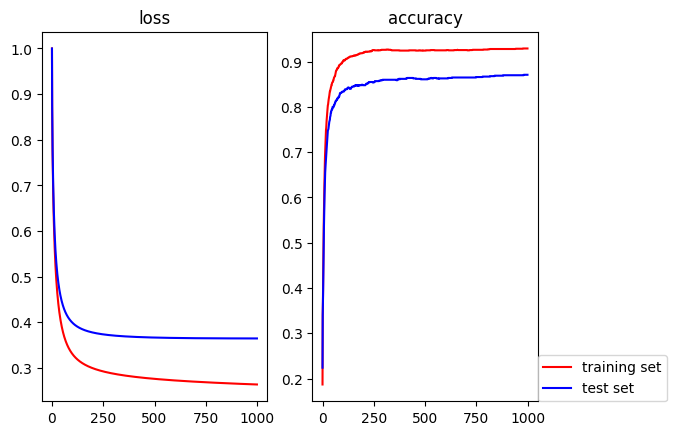

In [45]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("loss")
ax[0].plot(losses_train, color='r', label='training set')
ax[0].plot(losses_test, color='b', label='test set')

ax[1].set_title("accuracy")
ax[1].plot(accuracies_train, color='r', label='training set')
ax[1].plot(accuracies_test, color='b', label='test set')
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
plt.show()

Next, try different learning rates to train the model and plot the result of accuracy in training set.

In [55]:
epoch = 100
Phi1 = np.zeros((256, 10))
Phi0 = np.zeros((1, 10))
accuracy_train = []
accuracy_test = []
loss_train = []
loss_test = []
learning_rate = np.arange(0.0001, 0.009, 0.0001)
for alpha in learning_rate:
    one_hot_train = one_hot_encoding(train_out)
    one_hot_test = one_hot_encoding(test_out)
    for i in range(epoch):
        Phi1, Phi0 = gradient_descent_1(train_in, one_hot_train, Phi1, Phi0, alpha)

    loss_f = loss_function_1(train_in, one_hot_train, Phi1, Phi0)
    loss_train.append(loss_f)
    loss_t = loss_function_1(test_in, one_hot_test, Phi1, Phi0)
    loss_test.append(loss_t)

    digit_f = multi_class_1(train_in, Phi1, Phi0)
    accuracy = np.sum(digit_f.reshape(-1, 1) == train_out, dtype=float)/len(train_out)
    accuracy_train.append(accuracy)
    digit_t = multi_class_1(test_in, Phi1, Phi0)
    accuracy_t = np.sum(digit_t.reshape(-1, 1) == test_out, dtype=float)/len(test_out)
    accuracy_test.append(accuracy_t)

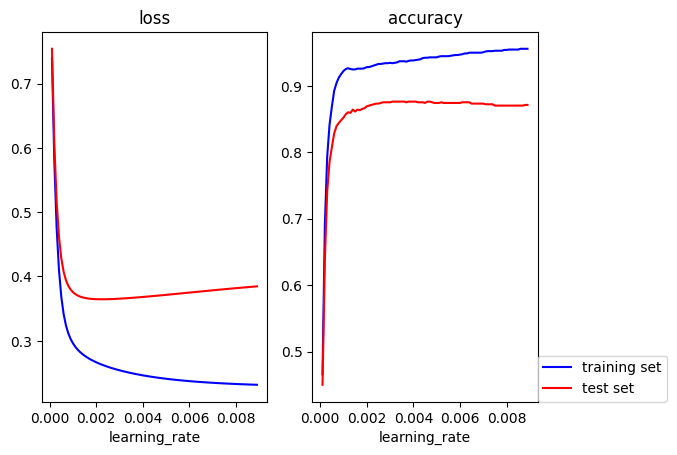

In [56]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("loss")
ax[0].set_xlabel("learning_rate")
ax[0].plot(learning_rate, loss_train, color='b',)
ax[0].plot(learning_rate, loss_test, color='r')
ax[1].set_title("accuracy")
ax[1].set_xlabel("learning_rate")
ax[1].plot(learning_rate, accuracy_train, color='b', label='training set')
ax[1].plot(learning_rate, accuracy_test, color='r', label='test set')
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
plt.show()